# Twitter Sentiment Analysis on Trans-Mountain Pipeline 

## Data Scraping
The tweets were collected using the standard search API, which searches against a sampling of recent Tweets published in the past 7 days. **1288 tweets** and their relavent data (creation time, user info, device etc) was collected for sentiment analysis. A simple script was written that collected the data and saved them as json format ([tmp_twitter_data.json](https://github.com/dhrubomoy/twitter-data/blob/master/TransMountain/bc_tweets2.json "tmp_twitter_data.json")). The code can be found [here](https://github.com/dhrubomoy/twitter-data/blob/master/TransMountain/bc_tweets_data.py "here")

## Sentiment Analysis
### Data Cleaning
First we need to only collect the relavanent info (for now only the tweet text) from the json file. Then we need to clean the text by removing urls and special characters.

In [5]:
import json
import re

# Open file and store the info
with open('tmp_twitter_data.json') as f:
    data = json.load(f)

def clean(tweet):
    # Remove hyperlinks and special chars
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split()) 

cleaned_tweets = []

# Iterate through the data, clean and store the tweets
for d in data:
    cleaned_tweets.append(clean(d['full_text']))

### Word Cloud
We can make visual representation of text data by generating word cloud, which will give some insight into the relative prominence of the words used. We can remove some words that will obviously be used the most (e.g. trans mountain pipline, canada).

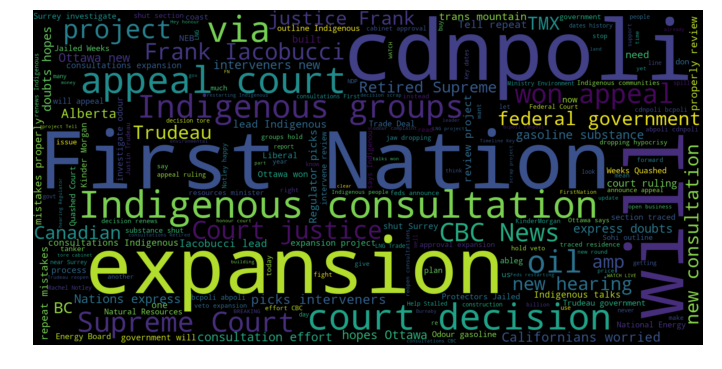

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets in a single text
wordcloud_texts = ' '.join(cleaned_tweets)
# Remove the obvious words
remove_words = 'Trans|Mountain|TransMountain|pipeline|Pipeline|Canada'
wordcloud_texts = re.sub(remove_words, '', wordcloud_texts)

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(wordcloud_texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### SA using Textblob
Textblob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks including sentiment analysis. It comes with a pre trained classifier. We can get both polarity and subjectivity of a text. Subjectivity is a float within the range [0.0, 1.0] and polarity score is a float within the range [-1.0, 1.0] where -1.0 is very negative and 1.0 is very positive.

In [3]:
from textblob import TextBlob

# Keep track of number of positive, negative and neutral tweets
positive = 0
negative = 0
neutral = 0

for t in cleaned_tweets:
    analysis = TextBlob(t)
    if analysis.sentiment.polarity > 0:     # Positive
        positive += 1
    elif analysis.sentiment.polarity < 0:   # Negative
        negative += 1
    else:                                   # Neutral
        neutral += 1


#### Pie Chart
Now we can use those info to create a pie chart using matplotlib library.

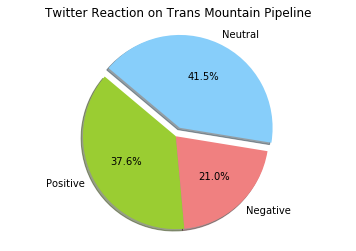

In [4]:
# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Twitter Reaction on Trans Mountain Pipeline')
plt.axis('equal')
plt.show()